<a href="https://colab.research.google.com/github/fernandodiass/datascienceprojects/blob/main/previsaodevendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
historico_vendas = pd.read_csv('/content/drive/My Drive/Data Science/SS/vendas.csv', encoding='ISO-8859-1')


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

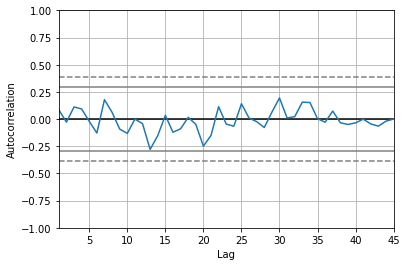

In [9]:
autocorrelation_plot(historico_vendas)
pyplot.show()

In [46]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

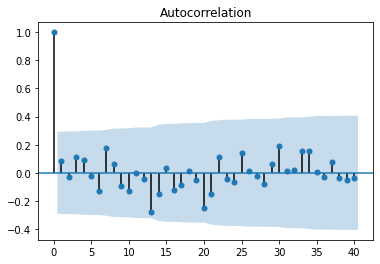

In [11]:
plot_acf(historico_vendas, lags=40)
pyplot.show()

In [61]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
model = ARIMA(historico_vendas, order=(10,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                    ARIMA Model Results                                    
Dep. Variable:     D.Mês-Ano;Qt. Vendas ;Valor ($)   No. Observations:                   44
Model:                             ARIMA(10, 1, 1)   Log Likelihood                -207.220
Method:                                    css-mle   S.D. of innovations             26.243
Date:                             Mon, 12 Oct 2020   AIC                            440.439
Time:                                     00:52:44   BIC                            463.634
Sample:                                          1   HQIC                           449.041
                                                                                           
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.7096 

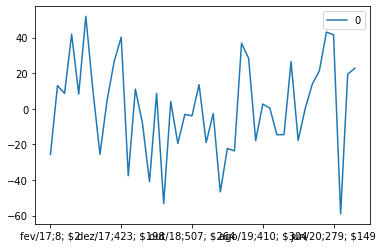

In [64]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

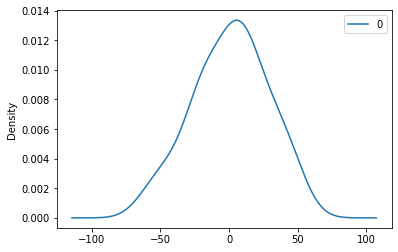

In [136]:
# gráficos de desnsidade dos resiuais
residuals.plot(kind='kde')
pyplot.show()

In [137]:
# estatística descritiva dos resíduos
print(residuals.describe())

               0
count  44.000000
mean    0.965146
std    27.040105
min   -59.098714
25%   -18.175514
50%     3.302930
75%    19.886720
max    51.940556


In [138]:
# a variável x recebe os dados do historico de vendas
X = historico_vendas.values
X = X.astype('float32')

# separa 50% para treino e 50% para teste
size = int(len(X) * 0.50)

# separa dados de treino e teste
train = X[0:size]
test = X[size:]

# cria uma variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()


In [139]:
# função de diferenciação
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset [i - interval]
    diff.append(value)
  return diff

# função que reverte a diferenciação para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [149]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [151]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=72.552, Valor esperado= 50
Valor predito=92.779, Valor esperado= 20
Valor predito=-7.596, Valor esperado= 26
Valor predito=81.086, Valor esperado=  8
Valor predito=57.788, Valor esperado=  6
Valor predito=-5.429, Valor esperado=  5
Valor predito=51.522, Valor esperado= 58
Valor predito=7.598, Valor esperado= 70
Valor predito=85.795, Valor esperado= 13
Valor predito=13.398, Valor esperado= 34
Valor predito=34.468, Valor esperado= 34
Valor predito=50.962, Valor esperado= 14
Valor predito=46.914, Valor esperado=  6
Valor predito=15.221, Valor esperado= 62
Valor predito=29.517, Valor esperado= 36
Valor predito=8.523, Valor esperado= 30
Valor predito=7.864, Valor esperado= 44
Valor predito=8.750, Valor esperado= 59
Valor predito=64.915, Valor esperado= 86
Valor predito=73.233, Valor esperado= 77
Valor predito=13.603, Valor esperado=  3
Valor predito=32.299, Valor esperado= 77
Valor predito=40.733, Valor esperado= 80


In [152]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 40.860


<function matplotlib.pyplot.show>

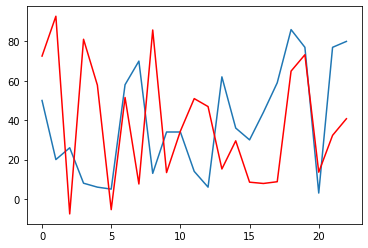

In [153]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show

In [154]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [155]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [156]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,-22.552086
1,-72.779198
2,33.595592
3,-73.086220
4,-51.787868


In [157]:
# estatística descritiva
residuals.describe()

,0
count,23.000000
mean,0.934940
std,41.767696
min,-73.086220
25%,-29.757156
50%,6.482738
75%,34.865606
max,62.402004


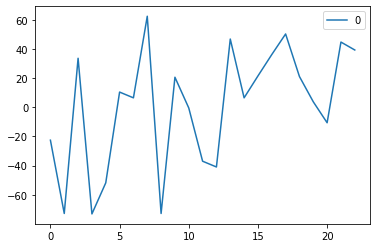

In [158]:
# plot residuals
residuals.plot()
pyplot.show()

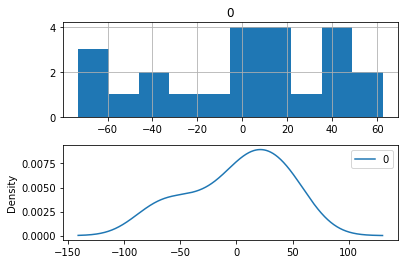

In [159]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [160]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

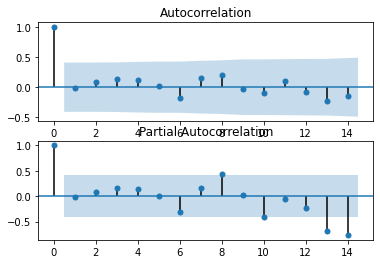

In [161]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()